<a href="https://colab.research.google.com/github/Barikko/Porject/blob/main/%D0%97%D0%B0%D1%91%D0%BC%D1%89%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`.

In [101]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
data = pd.read_csv('/content/sample_data/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [102]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [104]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [105]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [106]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [107]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [108]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [109]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [110]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [111]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [112]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [113]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [114]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [115]:
data.duplicated().sum()

71

In [116]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [117]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [118]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

<ipython-input-118-0bc713f3049f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_income_category'] = data['total_income'].apply(categorize_income)


**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [119]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [120]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [121]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

<ipython-input-121-ecf9d79505dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['purpose_category'] = data['purpose'].apply(categorize_purpose)


### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [122]:
children_debt = data.groupby('children')['debt'].mean()#Находим шанс невыплаты кредита в срок у каждой группы
print(data.groupby('children')['debt'].count())#Считаем количество семей в каждой категории
print('---------------------')
for x in range(len(children_debt)):
    print('Количество детей:',x," Вероятность невыплаты: %.3f" %children_debt[x])


children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: debt, dtype: int64
---------------------
Количество детей: 0  Вероятность невыплаты: 0.075
Количество детей: 1  Вероятность невыплаты: 0.092
Количество детей: 2  Вероятность невыплаты: 0.095
Количество детей: 3  Вероятность невыплаты: 0.082
Количество детей: 4  Вероятность невыплаты: 0.098
Количество детей: 5  Вероятность невыплаты: 0.000


          Всего  Должны  Вероятность невыплаты
children                                      
0         14091    1063               0.075438
1          4808     444               0.092346
2          2052     194               0.094542
3           330      27               0.081818
4            41       4               0.097561
5             9       0               0.000000


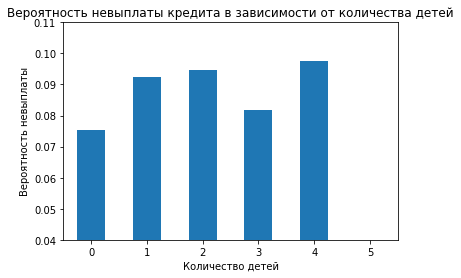

In [123]:
#Визуацизация данных
children_debt.plot(kind='bar',ylim=[0.04,0.11],title='Вероятность невыплаты кредита в зависимости от количества детей'\
                 ,xlabel='Количество детей',ylabel='Вероятность невыплаты')
plt.xticks(rotation = 0)
children_table = data.pivot_table(index='children', 
                     values='debt', 
                       aggfunc=['count', 'sum', 'mean'])
children_table.columns = ['Всего', 'Должны', 'Вероятность невыплаты']
print(children_table)

Вывод: Да, зависимость между количеством детей и возвратом кредита в срок есть. С увеличением количества детей от 0 до 2 увеличивается процент просрочивших плату (с около 8% до более 10%). Далее включать в анализ данные более многодетных семей только помешает выводам, так как количество семей с 3+ детьми очень небольшое и составляет очень маленькую часть всей базы. Например, все семьи с 5 детьми оплатили в срок. Но это не может значить, что все семьи с 5 детьми всегда будут платить в срок, просто их в базе данных всего 9, этого слишком мало для анализа. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [124]:
family_debt = data.groupby('family_status')['debt'].mean()#Находим шанс невыплаты кредита в срок у каждой группы
print(data.groupby('family_status')['debt'].count())#Считаем количество семей в каждой категории
print('--------------')
print(family_debt)

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: debt, dtype: int64
--------------
family_status
Не женат / не замужем    0.097639
в разводе                0.070648
вдовец / вдова           0.066246
гражданский брак         0.093130
женат / замужем          0.075606
Name: debt, dtype: float64


                       Всего  Должны  Вероятность невыплаты
family_status                                              
Не женат / не замужем   2796     273               0.097639
в разводе               1189      84               0.070648
вдовец / вдова           951      63               0.066246
гражданский брак        4134     385               0.093130
женат / замужем        12261     927               0.075606


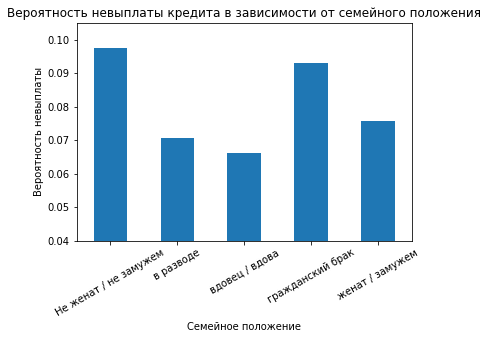

In [125]:
#Визуацизация данных
family_debt.plot(kind='bar',ylim=[0.04,0.105],title='Вероятность невыплаты кредита в зависимости от семейного положения'\
                 ,xlabel='Семейное положение',ylabel='Вероятность невыплаты')
plt.xticks(rotation = 30)
family_table = data.pivot_table(index='family_status', 
                     values='debt', 
                       aggfunc=['count', 'sum', 'mean'])
family_table.columns = ['Всего', 'Должны', 'Вероятность невыплаты']
print(family_table)


Вывод: Зависимости от семейного положения и возврата кредита в срок нет. Самое высокое отношение просрочивших платёж среди женаты / замужем, на втором месте - в разводе, далее - "Не женат / не замужем". Категории идут друг за другом, но по смыслу совершенно разные. Количество семей во всех категориях довольно большое и даёт нам возможность включать их все в анализ, соответственно, семейный статус не влияет на вероятность возврата кредита в срок. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [126]:
income_debt = data.groupby('total_income_category')['debt'].mean()#Находим шанс невыплаты кредита в срок у каждой группы
print(data.groupby('total_income_category')['debt'].count())#Считаем количество семей в каждой категории
print('--------------')
print(income_debt)

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: debt, dtype: int64
--------------
total_income_category
A    0.080000
B    0.070602
C    0.084982
D    0.060172
E    0.090909
Name: debt, dtype: float64


                       Всего  Должны  Вероятность невыплаты
total_income_category                                      
A                         25       2               0.080000
B                       5014     354               0.070602
C                      15921    1353               0.084982
D                        349      21               0.060172
E                         22       2               0.090909


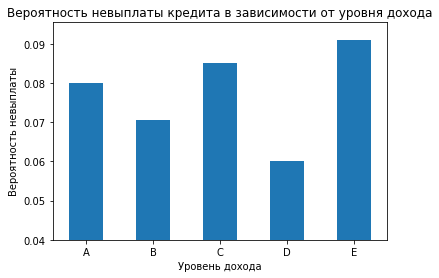

In [127]:
#Визуацизация данных
income_debt.plot(kind='bar',title='Вероятность невыплаты кредита в зависимости от уровня дохода'\
                 ,xlabel='Уровень дохода',ylabel='Вероятность невыплаты',ylim=0.04)
plt.xticks(rotation = 0)
income_table = data.pivot_table(index='total_income_category', 
                    values='debt', 
                     aggfunc=['count', 'sum', 'mean'])
income_table.columns = ['Всего', 'Должны', 'Вероятность невыплаты']
print(income_table)

Вывод: Зависимость между уровнем дохода и возвратом кредита в срок есть. Для более корректных выводов не будем учитывать категории с небольшим количеством семей (категории A, D, E). Сравнивая категории B и C, можно сделать вывод, что с уменьшением уровня дохода уменьшается вероятность выплаты кредита в срок.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [128]:
purpose_debt = data.groupby('purpose_category')['debt'].mean()#Находим шанс невыплаты кредита в срок у каждой группы
print(data.groupby('purpose_category')['debt'].count())#Считаем количество семей в каждой категории
print('--------------')
print(purpose_debt)



purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: debt, dtype: int64
--------------
purpose_category
операции с автомобилем      0.093480
операции с недвижимостью    0.072551
получение образования       0.092528
проведение свадьбы          0.079118
Name: debt, dtype: float64


                          Всего  Должны  Вероятность невыплаты
purpose_category                                              
операции с автомобилем     4279     400               0.093480
операции с недвижимостью  10751     780               0.072551
получение образования      3988     369               0.092528
проведение свадьбы         2313     183               0.079118


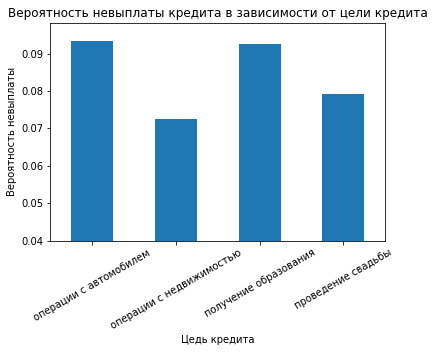

In [129]:
#Визуацизация данных
purpose_debt.plot(kind='bar',title='Вероятность невыплаты кредита в зависимости от цели кредита'\
                 ,xlabel='Цедь кредита',ylabel='Вероятность невыплаты',ylim=0.04)
plt.xticks(rotation = 30)
purpose_table = data.pivot_table(index='purpose_category', 
                    values='debt', 
                     aggfunc=['count', 'sum', 'mean'])
purpose_table.columns = ['Всего', 'Должны', 'Вероятность невыплаты']
print(purpose_table)

Вывод: Наименьший шанс невыплаты кредита в срок у семей в категории "операции с недвижимостью", далее по возрастнию идут "проведение свадьбы", "получение образования" и у группы "операции с автомобилем" наибольшее количество должников.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

Ответ: Некорректное заполнение данных, не в том формате. Случайный пропуск при вводе данных, пропуск, связанный с отсутствием информации к заполнению или желанием её скрыть.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Ответ: Медиана является лучшим решением, потому что на неё меньше, чем на среднее, влияют выпадающие, выделяющиеся среди большинства значения. 

### Шаг 4: общий вывод.

Вывод: Перед анализом данных обязательным была предобработка данных. Были заполнены медианным значением все пропущенные значения в таблице. Были убраны артефакты, мешавшие корректной обработке данных. Также было необходимо сгруппировать по категориям такие данные, как доход и цель кредита, так как такие данные проще и репрезентабельнее поместить в группы, которые потом будут обрабатываться.

Стоит обратить внимание на экстремальные значения в таблице, которые не были учтены при анализе. Например, среди заёмщиков с 5 детьми должников нет, но это ничего не говорит об их платёжеспособности, просто семей всего 9, что недостаточно для анализа. А наибольший шанс невыплаты кредита в срок у семей с 2 и 4 детьми (9.5% и 9.8% соответственно).

Семейное положение не влияет на факт погашения кредита в срок, этот параметр не является существенным по сравнению с другими. Количество детей, в свою очередь, влияет. Данные, полученные от банка, не позволяют оценить платёжеспособность клиентов с 3 и более детьми, так как такие семьи составляют наименьшую часть группы. Но сравнивая группы с 0, 1 и 2 детьми, можно сделать вывод, что с увеличением количества детей уменьшается шанс погашения кредита в срок.